In [1]:
import pandas as pd
grad_college = pd.read_csv('MA_Public_Schools_2017.csv')
grad_college = grad_college[grad_college['% Attending College'].notna()]
grad_college = grad_college[grad_college['% Graduated'].notna()]

In [2]:
grad_college.describe()

,School Code,Zip,District Code,PK_Enrollment,K_Enrollment,1_Enrollment,2_Enrollment,3_Enrollment,4_Enrollment,5_Enrollment,...,% MCAS_10thGrade_English_W/F,MCAS_10thGrade_English_Stud. Incl. #,MCAS_10thGrade_English_CPI,MCAS_10thGrade_English_SGP,MCAS_10thGrade_English_Incl. in SGP(#),School Accountability Percentile (1-99),Progress and Performance Index (PPI) - All Students,Progress and Performance Index (PPI) - High Needs Students,District_Progress and Performance Index (PPI) - All Students,District_Progress and Performance Index (PPI) - High Needs Students
count,3.430000e+02,343.000000,3.430000e+02,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000,...,331.000000,331.000000,331.000000,320.000000,330.000000,324.000000,326.000000,301.000000,341.000000,340.000000
mean,3.334181e+06,1886.040816,3.333673e+06,3.341108,2.574344,2.644315,2.379009,2.172012,2.180758,3.932945,...,2.096677,198.577039,97.061329,50.767187,175.172727,51.978395,75.352761,71.043189,65.994135,61.194118
std,2.664607e+06,482.740064,2.664599e+06,17.130825,15.677661,16.177796,15.558485,14.984480,15.023645,19.872654,...,3.037596,131.943638,3.621679,11.719275,115.226738,28.025135,13.865778,13.401050,14.340193,12.425256
min,1.050500e+04,1001.000000,1.000000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,10.000000,77.600000,25.500000,2.000000,1.000000,37.000000,41.000000,36.000000,32.000000
25%,1.125505e+06,1518.500000,1.125000e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,96.500000,96.300000,42.500000,85.000000,28.750000,64.000000,61.000000,55.000000,54.000000
50%,2.610505e+06,1923.000000,2.610000e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,167.000000,98.200000,50.000000,156.500000,53.000000,75.000000,71.000000,64.000000,58.000000
75%,4.915355e+06,2151.500000,4.915000e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.500000,290.500000,99.300000,58.000000,254.500000,76.000000,85.000000,80.000000,74.000000,69.000000
max,9.150705e+06,2780.000000,9.150000e+06,144.000000,124.000000,123.000000,141.000000,129.000000,135.000000,143.000000,...,20.000000,925.000000,100.000000,88.000000,757.000000,99.000000,100.000000,100.000000,100.000000,100.000000


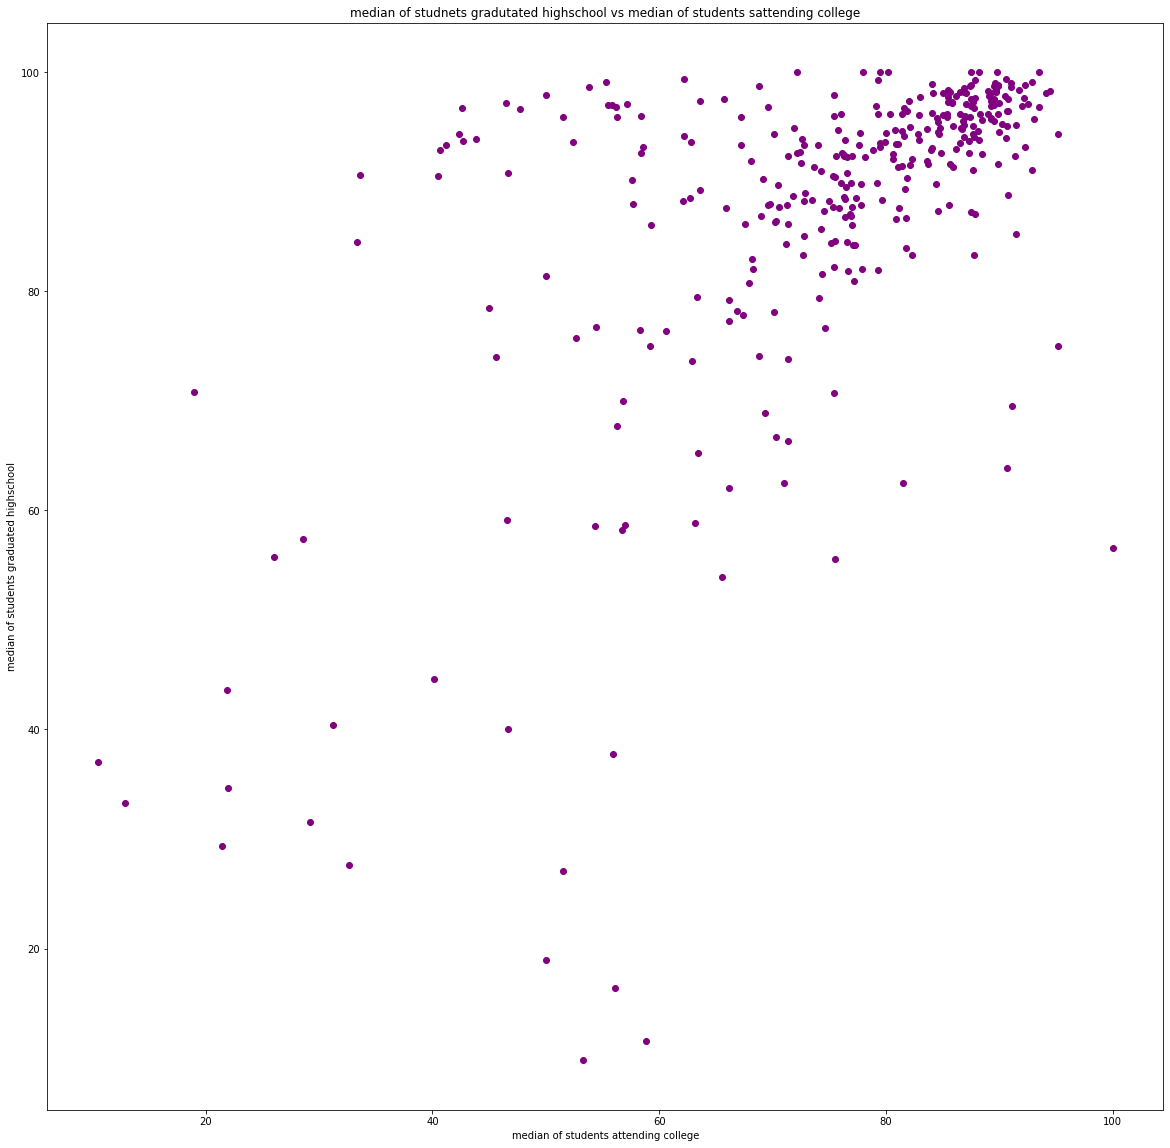

In [3]:
median_grad_rate = grad_college['% Graduated']
median_college_rate = grad_college['% Attending College']

#median_data = grad_salary[[]'median_grad_rate', 'median_college_rate']]

import matplotlib.pyplot as plt

plt.figure(figsize = (20,20))
plt.ylabel('median of students graduated highschool')
plt.xlabel('median of students attending college')
plt.title('median of studnets gradutated highschool vs median of students sattending college')
plt.scatter(median_college_rate, median_grad_rate, color='purple')

In [4]:
import numpy as np
import statsmodels.api as sm

In [5]:
x_ary = median_grad_rate
x_with_cnst = sm.add_constant(x_ary)
model = sm.OLS(median_college_rate, x_with_cnst)
results = model.fit()
b,m = results.params
print(m)
print(b)

0.5999332054652665
22.247399956922358


In [6]:
print(results.summary())

                             OLS Regression Results                            
Dep. Variable:     % Attending College   R-squared:                       0.350
Model:                             OLS   Adj. R-squared:                  0.348
Method:                  Least Squares   F-statistic:                     183.5
Date:                 Mon, 11 Jul 2022   Prob (F-statistic):           9.50e-34
Time:                         15:19:24   Log-Likelihood:                -1366.7
No. Observations:                  343   AIC:                             2737.
Df Residuals:                      341   BIC:                             2745.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          22.2474      3.926      5

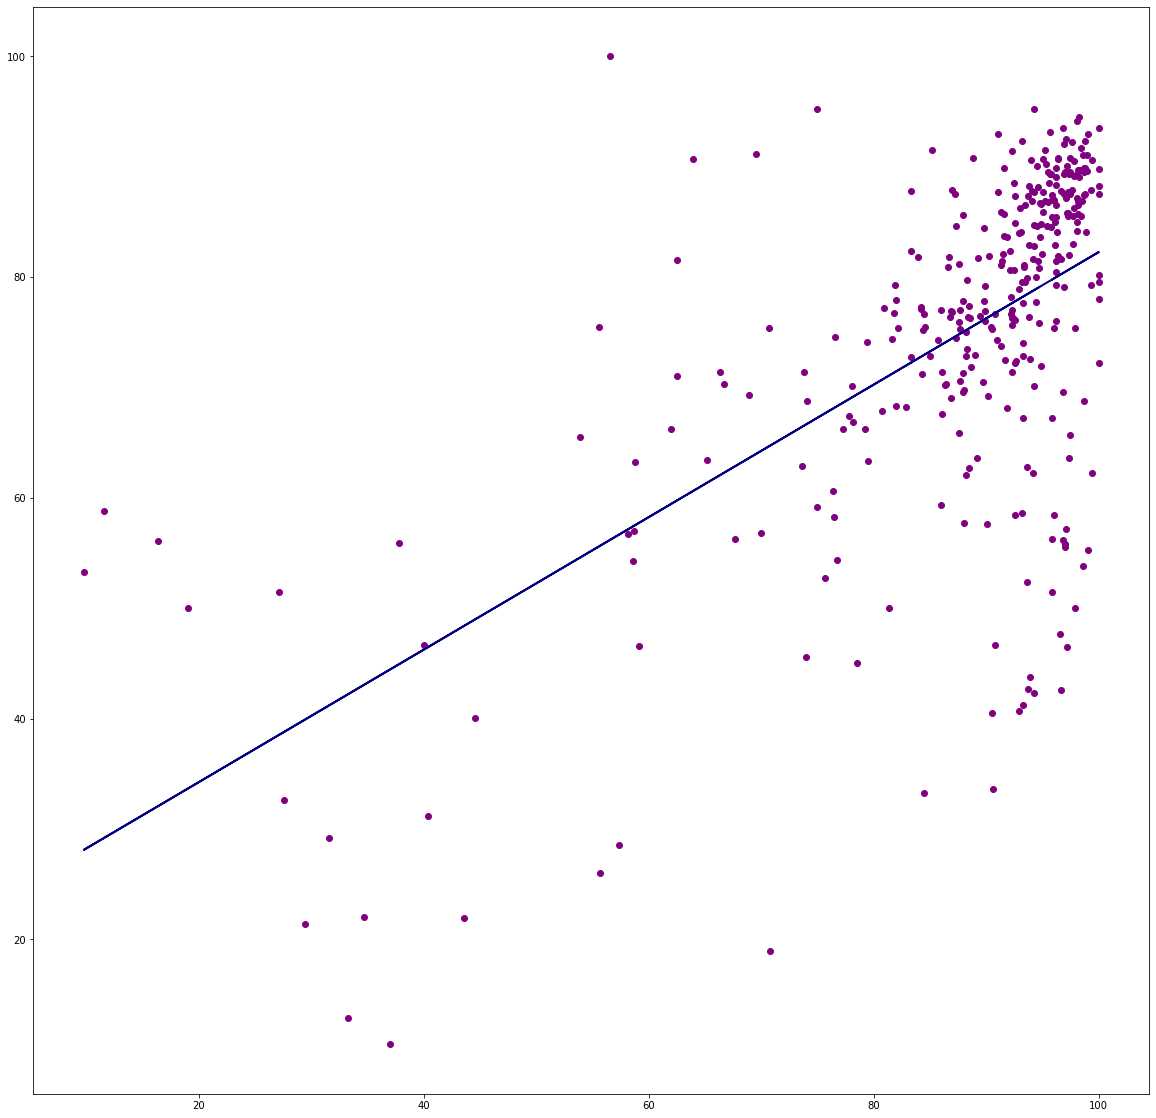

In [7]:
plt.figure(figsize = (20,20))
plt.scatter(median_grad_rate, median_college_rate, color='purple')
plt.plot(x_ary, m*x_ary+b, color='navy', linewidth = 2)